In [ ]:
import cv2 as cv
import numpy as np

from google.colab.patches import cv2_imshow

### **EXERCISE 01**

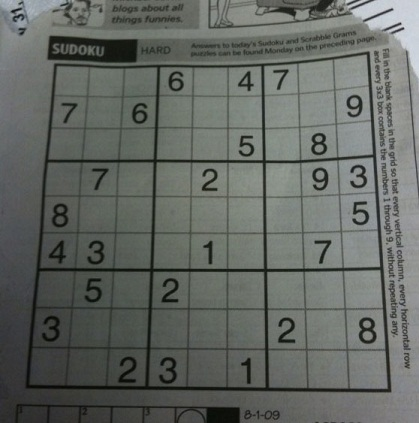

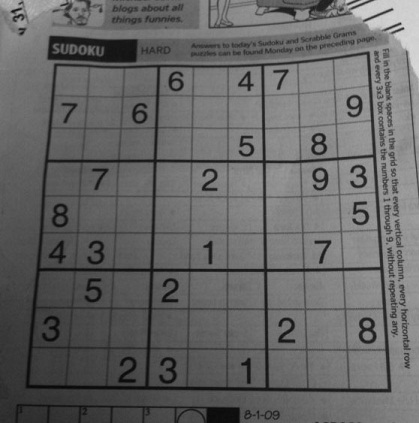

In [ ]:
img_01 = cv.imread('data/lab04_01.jpg')
gray_img = cv.cvtColor(img_01, cv.COLOR_BGR2GRAY)

cv2_imshow(img_01)
cv2_imshow(gray_img)

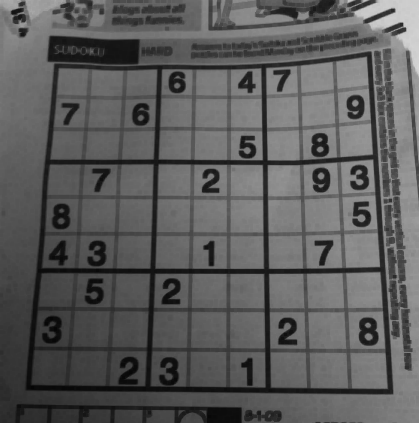

In [ ]:
#---Erosion
k_erosion = np.ones((2, 2), np.uint8)
erosion = cv.erode(gray_img, k_erosion, iterations=2)
cv2_imshow(erosion)

### **EXERCISE 02**

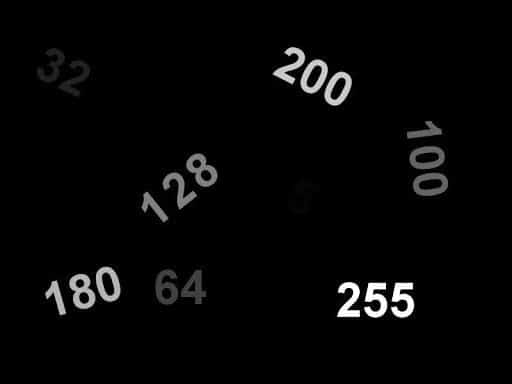

In [ ]:
img_02 = cv.imread('data/lab04_02.jpg')
gray_img = cv.cvtColor(img_02, cv.COLOR_BGR2GRAY)
r, binary_img = cv.threshold(gray_img, 50, 200, cv.THRESH_BINARY)

# cv2_imshow(img_02)
cv2_imshow(gray_img)
# cv2_imshow(img_binary)

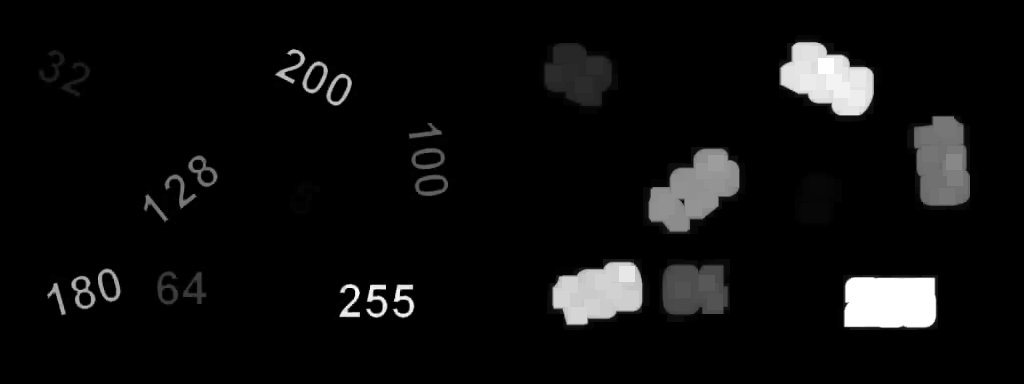

In [ ]:
#---Erosion
k_erosion = np.ones((2, 2), np.uint8)
erosion = cv.erode(gray_img, k_erosion, iterations=2)

#---Dilate
k_dilate = cv.getStructuringElement(cv.MORPH_RECT, (4,4))
dilate = cv.dilate(gray_img, k_dilate, iterations=5)

#---Output
out = np.hstack((erosion, dilate))
cv2_imshow(out)

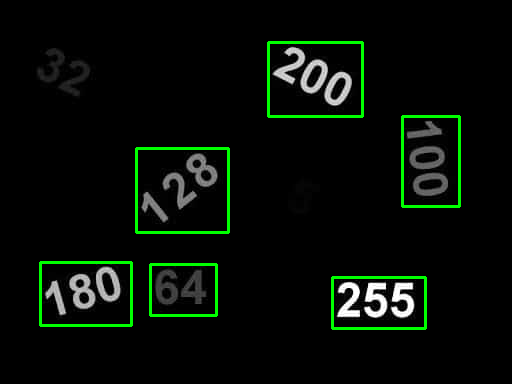

In [ ]:
canny_img = cv.Canny(dilate, 30, 200)
c_number, h = cv.findContours(canny_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for i in c_number :
  (x, y, w, h) = cv.boundingRect(i)
  minArea = cv.minAreaRect(i)
  box = minArea[1][0] * minArea[1][1]
  if box > 1 :
    cv.rectangle(img_02, (x,y), (x+w, y+h), (0,255,0), 2)
    
cv2_imshow(img_02)

### **EXERCISE 03**

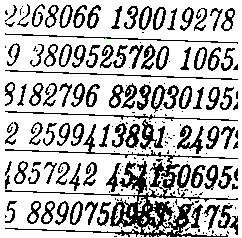

In [ ]:
img_03 = cv.imread('data/lab04_03.jpg')
r, binary_img = cv.threshold(img_03, 127, 255, cv.THRESH_BINARY)

# cv2_imshow(img_02)
cv2_imshow(binary_img)

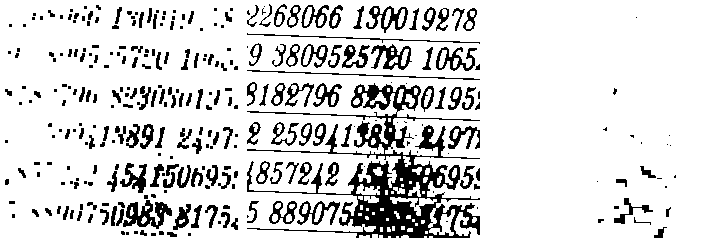

In [ ]:
kernel = np.ones((3, 3), np.uint8)

#---Closing
closing = cv.morphologyEx(binary_img, cv.MORPH_CLOSE, kernel)

#---Opening
opening = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel)

#---Dilate
k_dilate = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
dilate = cv.dilate(opening, k_dilate, iterations=3)

#---Output
out = np.hstack((closing, opening, dilate))
cv2_imshow(out)

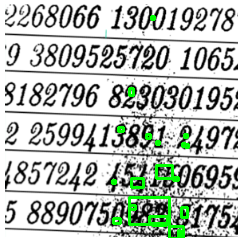

In [ ]:
canny_img = cv.Canny(dilate, 30, 200)
c_number, h = cv.findContours(canny_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for i in c_number :
  (x, y, w, h) = cv.boundingRect(i)
  minArea = cv.minAreaRect(i)
  box = minArea[1][0] * minArea[1][1]
  if box > 1 :
    cv.rectangle(img_03, (x,y), (x+w, y+h), (0,255,0), 2)
    
cv2_imshow(img_03)